In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv("airbnb.csv")
data

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,6291807,16375951,Entire home/apt,NaN,Jamaica Plain,1,NaN,4,2.0,119.0,14.0,42.298160,-71.111530,2016-05-19 02:58:16.563871
1,2656568,13597630,Entire home/apt,NaN,Back Bay,0,NaN,2,1.0,600.0,1.0,42.348072,-71.076639,2016-05-19 02:58:06.015822
2,10723203,15913699,Private room,NaN,Allston,2,NaN,2,1.0,96.0,1.0,42.350588,-71.129477,2016-05-19 02:57:39.074104
3,10034592,20399668,Private room,NaN,Dorchester,13,5.0,2,1.0,55.0,1.0,42.317168,-71.040483,2016-05-19 02:57:28.669274
4,5454513,4962900,Entire home/apt,NaN,Back Bay,13,4.5,5,2.0,276.0,NaN,42.346598,-71.080123,2016-05-19 02:56:56.182103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,8519646,15098486,Private room,NaN,North End,16,4.5,2,1.0,116.0,1.0,42.364245,-71.052945,2016-05-18 23:41:35.473009
3273,6574771,16881770,Private room,NaN,Dorchester,9,5.0,1,1.0,40.0,3.0,42.323962,-71.058513,2016-05-19 02:20:38.220232
3274,1321422,6608084,Private room,NaN,Dorchester,168,5.0,3,1.0,45.0,1.0,42.308380,-71.046943,2016-05-18 21:23:24.849565
3275,12590656,51449558,Private room,NaN,Dorchester,0,NaN,3,1.0,55.0,2.0,42.321141,-71.056032,2016-05-18 20:23:17.028579


In [58]:
# room_id, host_id, total_score(overall_satisfaction + reviews*0.378)
df = data.copy()
df = df.set_index(['room_id', 'host_id']) # 인덱스 설정
df['total_score'] = df['overall_satisfaction'] + (df['reviews'] * 0.378) # 새로운 변수 total_score 생성
df = df.loc[:, ['total_score']] # 슬라이싱

df

,,total_score
room_id,host_id,
6291807,16375951,NaN
2656568,13597630,NaN
10723203,15913699,NaN
10034592,20399668,9.914
5454513,4962900,9.414
...,...,...
8519646,15098486,10.548
6574771,16881770,8.402
1321422,6608084,68.504


In [63]:
df_sorted1 = df.sort_values(by='total_score', ascending=True) # total_score기준으로 오름차순 정렬
df_sorted1

,,total_score
room_id,host_id,
11757251,26873897,2.134
12049787,32532791,3.134
4503393,16442921,3.634
10594800,54664198,4.134
3303860,16442921,4.512
...,...,...
13063952,21745230,NaN
10268223,52796234,NaN
11148266,51449558,NaN


In [64]:
df_sorted2 = df.sort_values(by='total_score', ascending=False)# total_score 기준으로 내림차순 정렬
df_sorted2

,,total_score
room_id,host_id,
66288,324630,149.530
414419,2027295,111.474
1497879,2776892,110.718
31796,119019,103.536
815639,3637081,98.622
...,...,...
13063952,21745230,NaN
10268223,52796234,NaN
11148266,51449558,NaN


In [91]:
# Grouping by neighborhood
df = data.copy()

Neighbor = df.groupby('neighborhood')

df1 = pd.DataFrame({'avg of reviews' : Neighbor.mean()['reviews'], 
                     'avg of overall_satisfaction' : Neighbor.mean()['overall_satisfaction'],
                     'avg of price' : Neighbor.mean()['price'], 
                     'max of reviews' : Neighbor.max()['reviews'],
                     'min of reviews' : Neighbor.min()['reviews'],
                     'max of price' : Neighbor.max()['price'],
                     'min of price' : Neighbor.min()['price']})
df1.sort_index(axis=0, ascending=True)
df1

,avg of reviews,avg of overall_satisfaction,avg of price,max of reviews,min of reviews,max of price,min of price
neighborhood,,,,,,,
Allston,10.314010,4.670455,100.019324,118,0,550.0,20.0
Back Bay,11.296820,4.649390,237.515901,283,0,1372.0,41.0
Bay Village,10.947368,4.500000,254.157895,47,0,1200.0,81.0
Beacon Hill,17.800000,4.615942,215.907317,214,0,849.0,42.0
Brighton,13.250000,4.681319,113.955556,152,0,999.0,10.0
Charlestown,24.430769,4.813953,228.538462,198,0,1000.0,55.0
Chinatown,11.909091,4.678571,254.927273,172,0,600.0,92.0
Dorchester,25.000000,4.537267,91.575000,262,0,395.0,30.0
Downtown,14.671053,4.666667,241.184211,188,0,1000.0,38.0


In [89]:
# csv write
file_name = "./sorted_neighborhood_factors.csv"
df1.to_csv(file_name)

In [107]:
# grouping by price range  
df = data.copy()

ranges = [0, 100, 200, 300, 400, 500, 1000, 5000]
PriceRange = df.groupby(pd.cut(df['price'], ranges))

df2 = pd.DataFrame({'accommodates average' : PriceRange.mean()['accommodates'], 
                     'accommodates median' : PriceRange.median()['accommodates'],
                     'bedrooms average' : PriceRange.mean()['bedrooms'], 
                     'bedrooms median' : PriceRange.median()['bedrooms'],
                     'reviews average' : PriceRange.mean()['reviews'],
                     'reviews median' : PriceRange.median()['reviews'],
                     'neighbor list' : PriceRange['neighborhood'].apply(list),
                     'lenghth' : PriceRange.count()['neighborhood']})
df2

,accommodates average,accommodates median,bedrooms average,bedrooms median,reviews average,reviews median,neighbor list,lenghth
price,,,,,,,,
"(0, 100]",1.998331,2.0,0.994157,1.0,20.187813,5.0,"[Allston, Dorchester, East Boston, Allston, Al...",1198
"(100, 200]",3.120521,3.0,1.137143,1.0,17.146580,5.0,"[Jamaica Plain, Beacon Hill, Beacon Hill, Miss...",1228
"(200, 300]",3.964286,4.0,1.581489,1.0,13.380952,4.0,"[Back Bay, Jamaica Plain, Back Bay, Beacon Hil...",504
"(300, 400]",4.775862,4.0,2.017241,2.0,9.362069,4.0,"[Downtown, South Boston Waterfront, Fenway, Ch...",174
"(400, 500]",4.811765,4.0,2.023529,2.0,6.105882,1.0,"[Mission Hill, South Boston Waterfront, Jamaic...",85
"(500, 1000]",5.172840,5.0,2.308642,2.0,4.444444,0.0,"[Back Bay, Fenway, Back Bay, Fenway, Chinatown...",81
"(1000, 5000]",4.000000,4.0,2.142857,2.0,0.000000,0.0,"[Back Bay, Bay Village, Fenway, South End, Sou...",7


In [108]:
# csv write
file_name = "./sorted_ranged_pric.csv"
df2.to_csv(file_name)

<AxesSubplot:xlabel='price'>

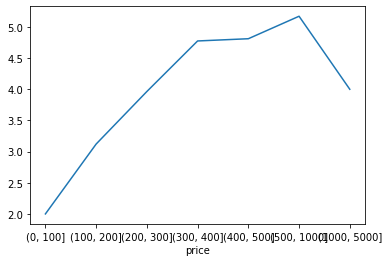

In [118]:
# visualization
%matplotlib inline
# x = ranged price, y = accommodates average
df2['accommodates average'].plot()

<AxesSubplot:xlabel='price'>

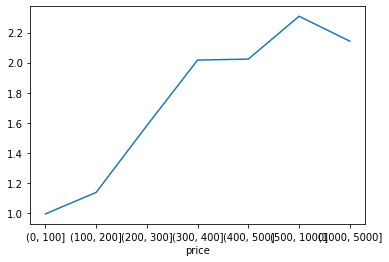

In [119]:
# x = ranged price, y = bedrooms average
df2['bedrooms average'].plot()

array([<AxesSubplot:xlabel='neighborhood'>,
       <AxesSubplot:xlabel='neighborhood'>,
       <AxesSubplot:xlabel='neighborhood'>], dtype=object)

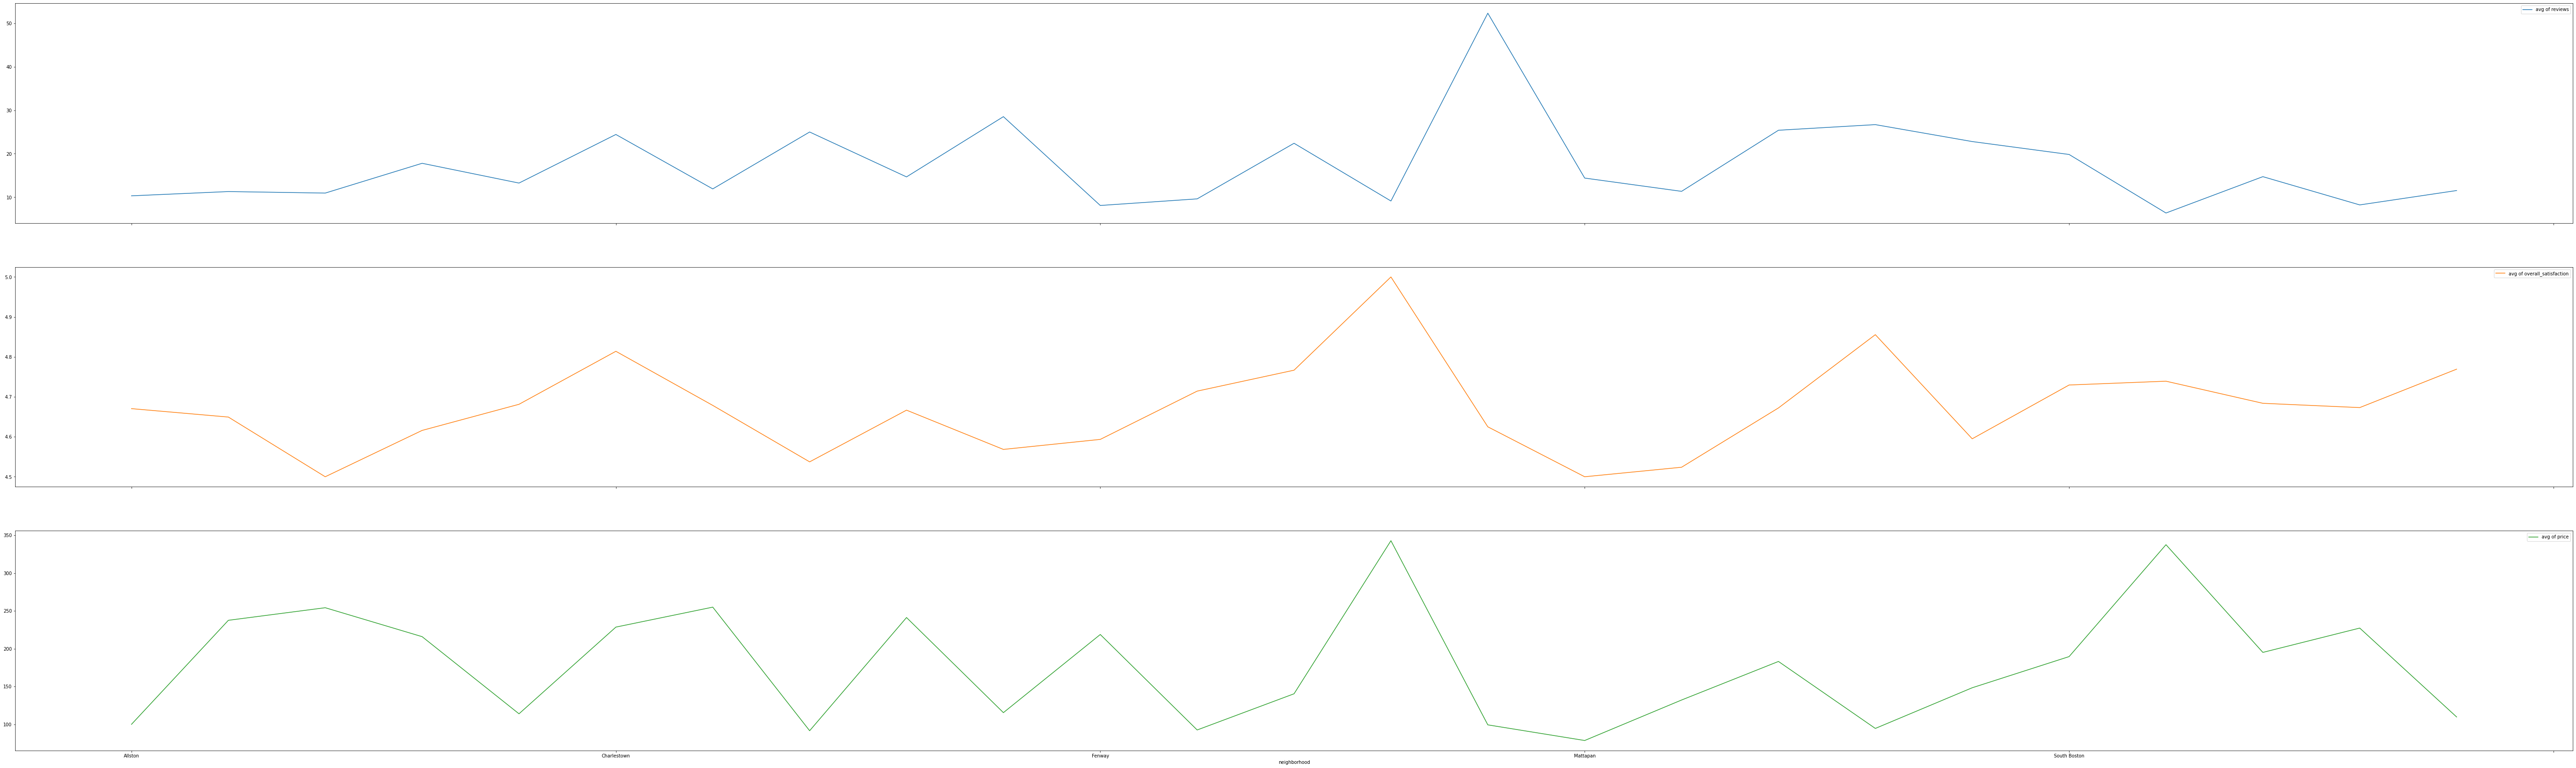

In [144]:
# x = neighbor, y = avg reviews, avg overall_satisfaction, avg price
# using subplots

# way 1
df1[['avg of reviews', 'avg of overall_satisfaction', 'avg of price']].plot(figsize=(100,30), subplots=True)

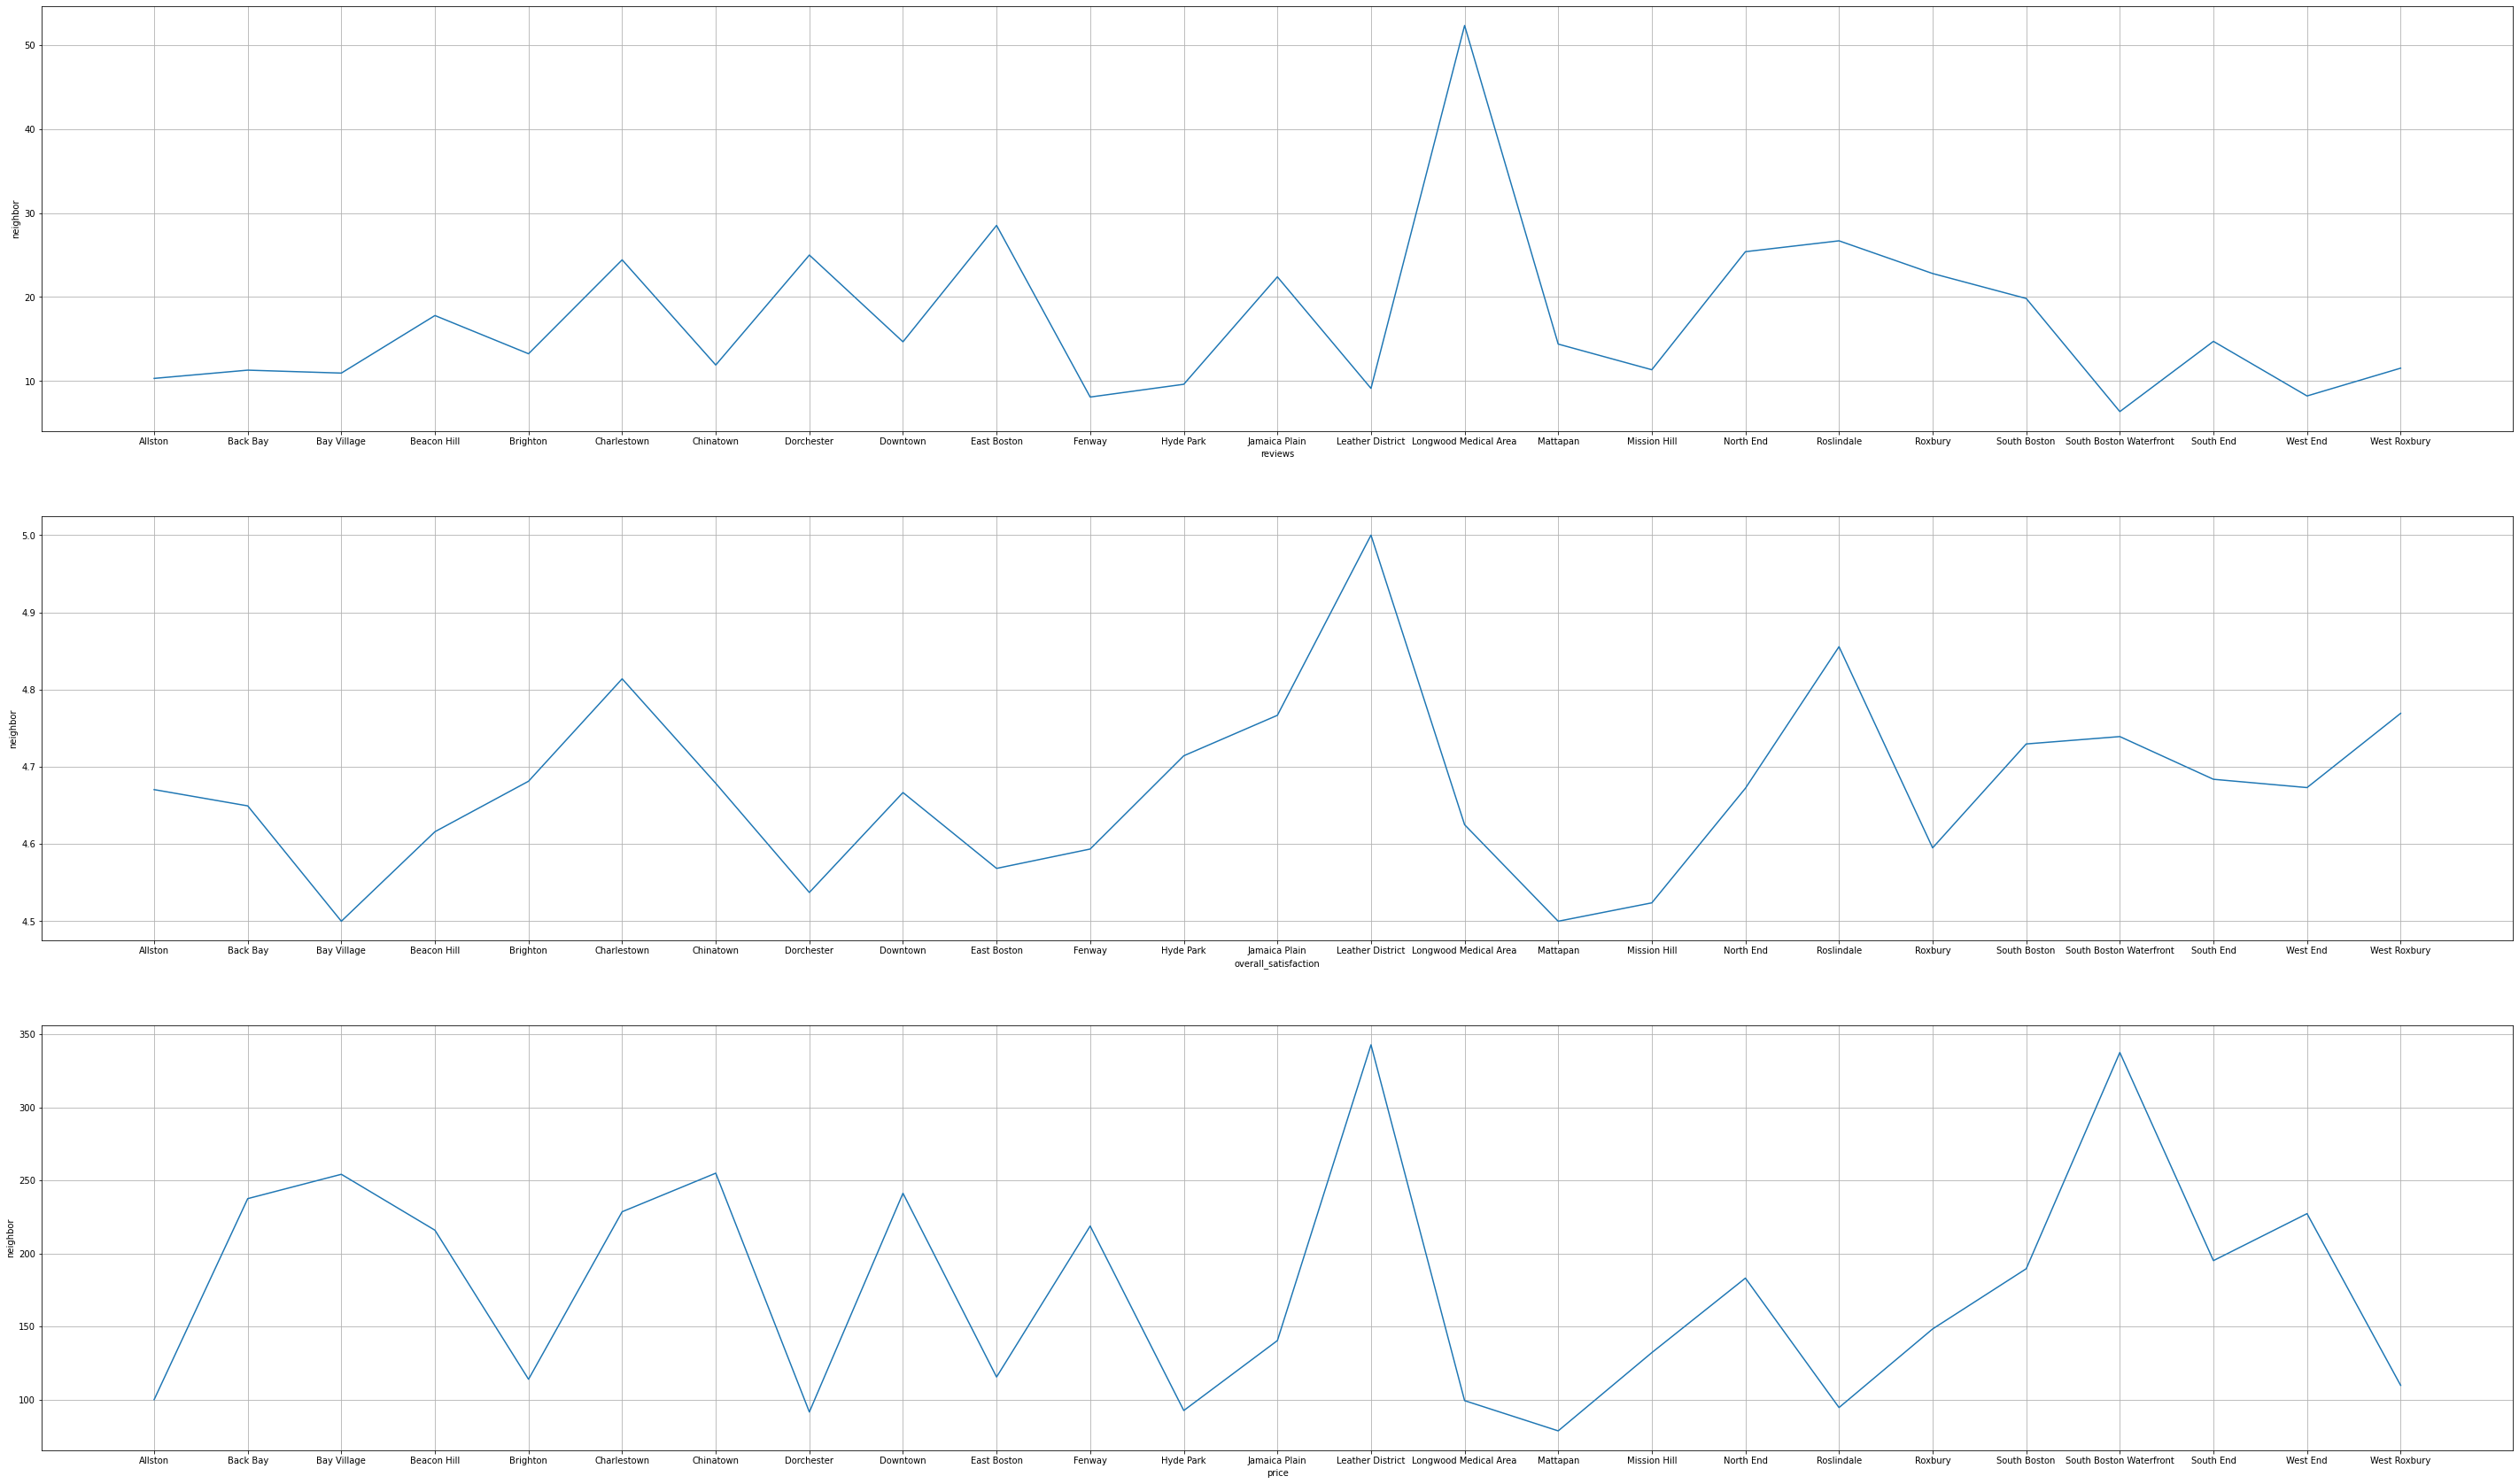

In [145]:
# way 2

plt.figure(figsize=(50, 30))

plt.subplot(311)
plt.xlabel('reviews')
plt.ylabel('neighbor')
plt.plot(df1['avg of reviews'])
plt.grid()

plt.subplot(312)
plt.xlabel('overall_satisfaction')
plt.ylabel('neighbor')
plt.plot(df1['avg of overall_satisfaction'])
plt.grid()

plt.subplot(313)
plt.xlabel('price')
plt.ylabel('neighbor')
plt.plot(df1['avg of price'])
plt.grid()

plt.show()